<a href="https://colab.research.google.com/github/WilliamShengYangHuang/RC18_Machine_Learning/blob/main/HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visual Feature Anaysis: Histogram of Oriented Gradients (HOG)**

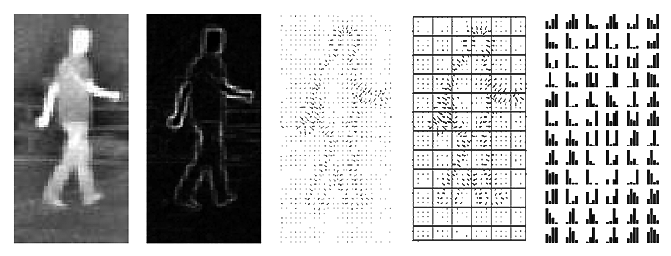

Histogram of Oriented Gradients (HOG) is a feature descriptor that's particularly used in object detection. It works by capturing the structure or the shape of objects by looking at the gradient of the image intensity at each pixel and creating histograms from these gradients.

Algorithm Source: Dalal, N. & Triggs, B. Histograms of Oriented Gradients for Human Detection.  *2005 IEEE computer society conference on computer vision and pattern recognition (CVPR'05)*, 2005. Ieee, 886-893.

Notebook developed by William Huang, June, 2021

## Load Necessary Packages

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 14.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
import pandas as pd

from skimage.io import imread
from skimage.io import imshow
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import exposure

import cv2 as cv
import matplotlib.pyplot as plt

from google.colab import drive

## Load Image Data

In [ ]:
drive.mount('/content/drive')
file_name = 'interpolated.png' #@param{type:'string'}
data_format = '.png' #@param ['.png', '.jpg', '.bmp', '.tif'] {type:'string'}
PATH = '/content/drive/My Drive/' + file_name

Mounted at /content/drive


(688, 985, 3)
<class 'tuple'>


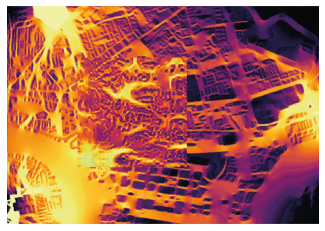

In [ ]:
img = imread(PATH)
plt.axis("off")
plt.imshow(img)

print(img.shape)
print(type(img.shape))

## Resize Image

(688, 985, 3)


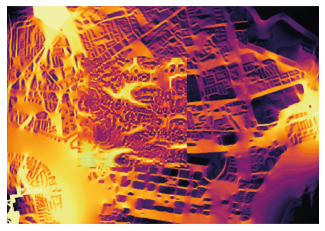

In [ ]:
h = img.shape[0]
w = img.shape[1]
div = 1
resized_img = resize(img, (h/div, w/div))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

## Create and Visualise HOG Features

In [ ]:
cell_size = 16 #@param{type:'slider', min:1, max:64, step:1}

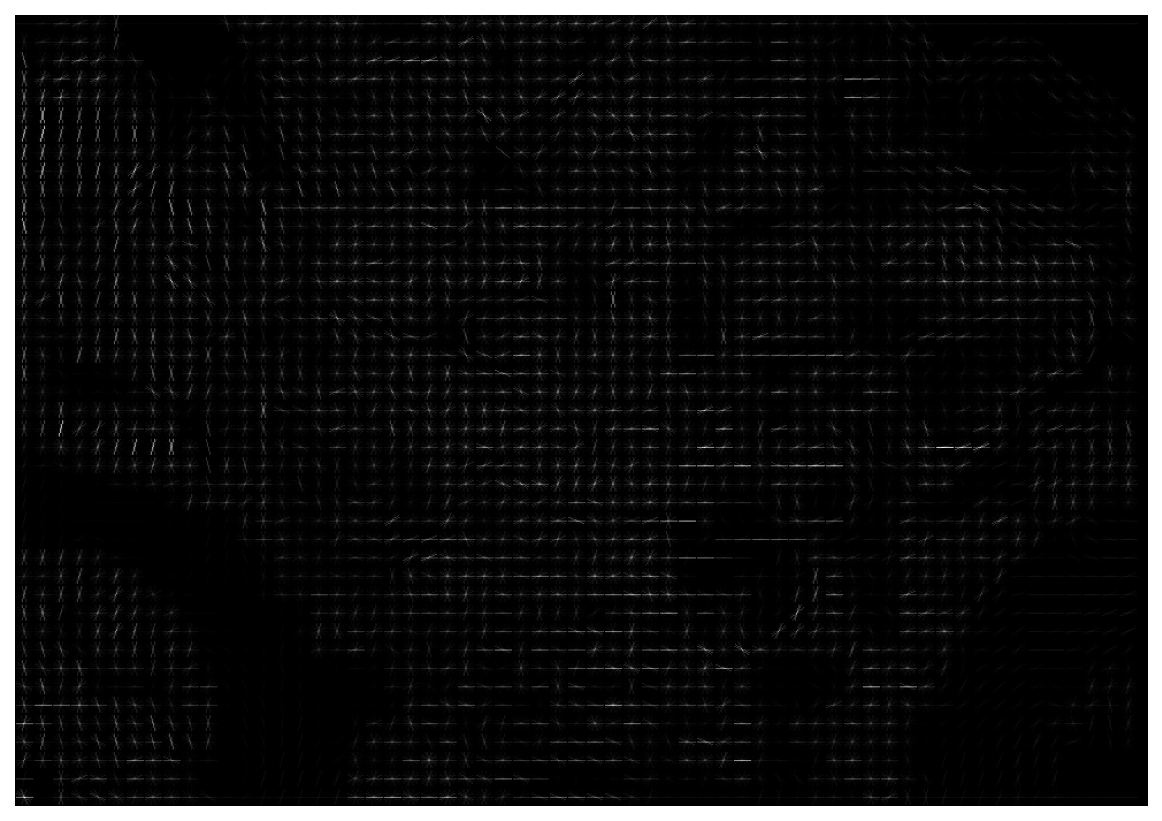

In [ ]:
figue_size_x = 10 #@param{type:'slider', min:1, max:16, step:0.5}
figue_size_y = 10 #@param{type:'slider', min:1, max:16, step:0.5}
resolution = 150 #@param{type:'slider', min:1, max:1200, step:50}

plt.figure(figsize=(figue_size_x, figue_size_y*h/w), dpi=resolution)
fd, hog_img = hog(resized_img, orientations=9, pixels_per_cell=(cell_size, cell_size),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_img, cmap="gray")
plt.show()

In [ ]:
fd # feature data in 1d array

array([0.05701535, 0.01023759, 0.03812949, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
fd.shape # block num(x)*block num(y)*(cell num per block*orientation)

(90720,)

###Variance

In [ ]:
# variance of feature data

import statistics

output = statistics.variance(fd)

print(output)

0.008864848339265395


## Binarising HOG Image

In [ ]:
df = pd.DataFrame(hog_img)
df

,0,1,2,3,4,5,6,7,8,9,...,975,976,977,978,979,980,981,982,983,984
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.000103,0.000000,0.000416,0.000000,0.000000,0.001717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.000103,0.000416,0.000000,0.000000,0.001717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000498,0.000000,0.000000,0.000103,0.000416,0.000000,0.000000,0.001717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000498,0.000000,0.000000,0.000103,0.000416,0.001717,0.000308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0.0,0.0,0.000000,0.009461,0.000000,0.000000,0.012222,0.024544,0.023719,0.056100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
684,0.0,0.0,0.009461,0.000000,0.000000,0.012222,0.024544,0.000000,0.000000,0.023719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
685,0.0,0.0,0.000000,0.000000,0.000000,0.012222,0.024544,0.000000,0.000000,0.023719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
686,0.0,0.0,0.000000,0.000000,0.012222,0.000000,0.024544,0.000000,0.000000,0.023719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
threshold = 0.0305 #@param{type:'slider', min:0, max:1, step:0.0001}

In [ ]:
binarisation = (df > threshold).astype(int)
binarisation

,0,1,2,3,4,5,6,7,8,9,...,975,976,977,978,979,980,981,982,983,984
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
binarised_df= binarisation.to_numpy()
binarised_df

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

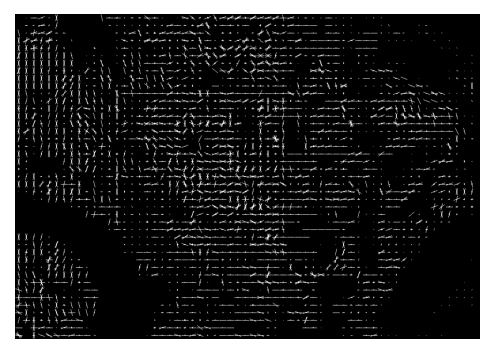

In [ ]:
plt.figure(figsize=(4, 4), dpi=150)
plt.axis("off")
plt.imshow(binarised_df, cmap='gray')
plt.show()

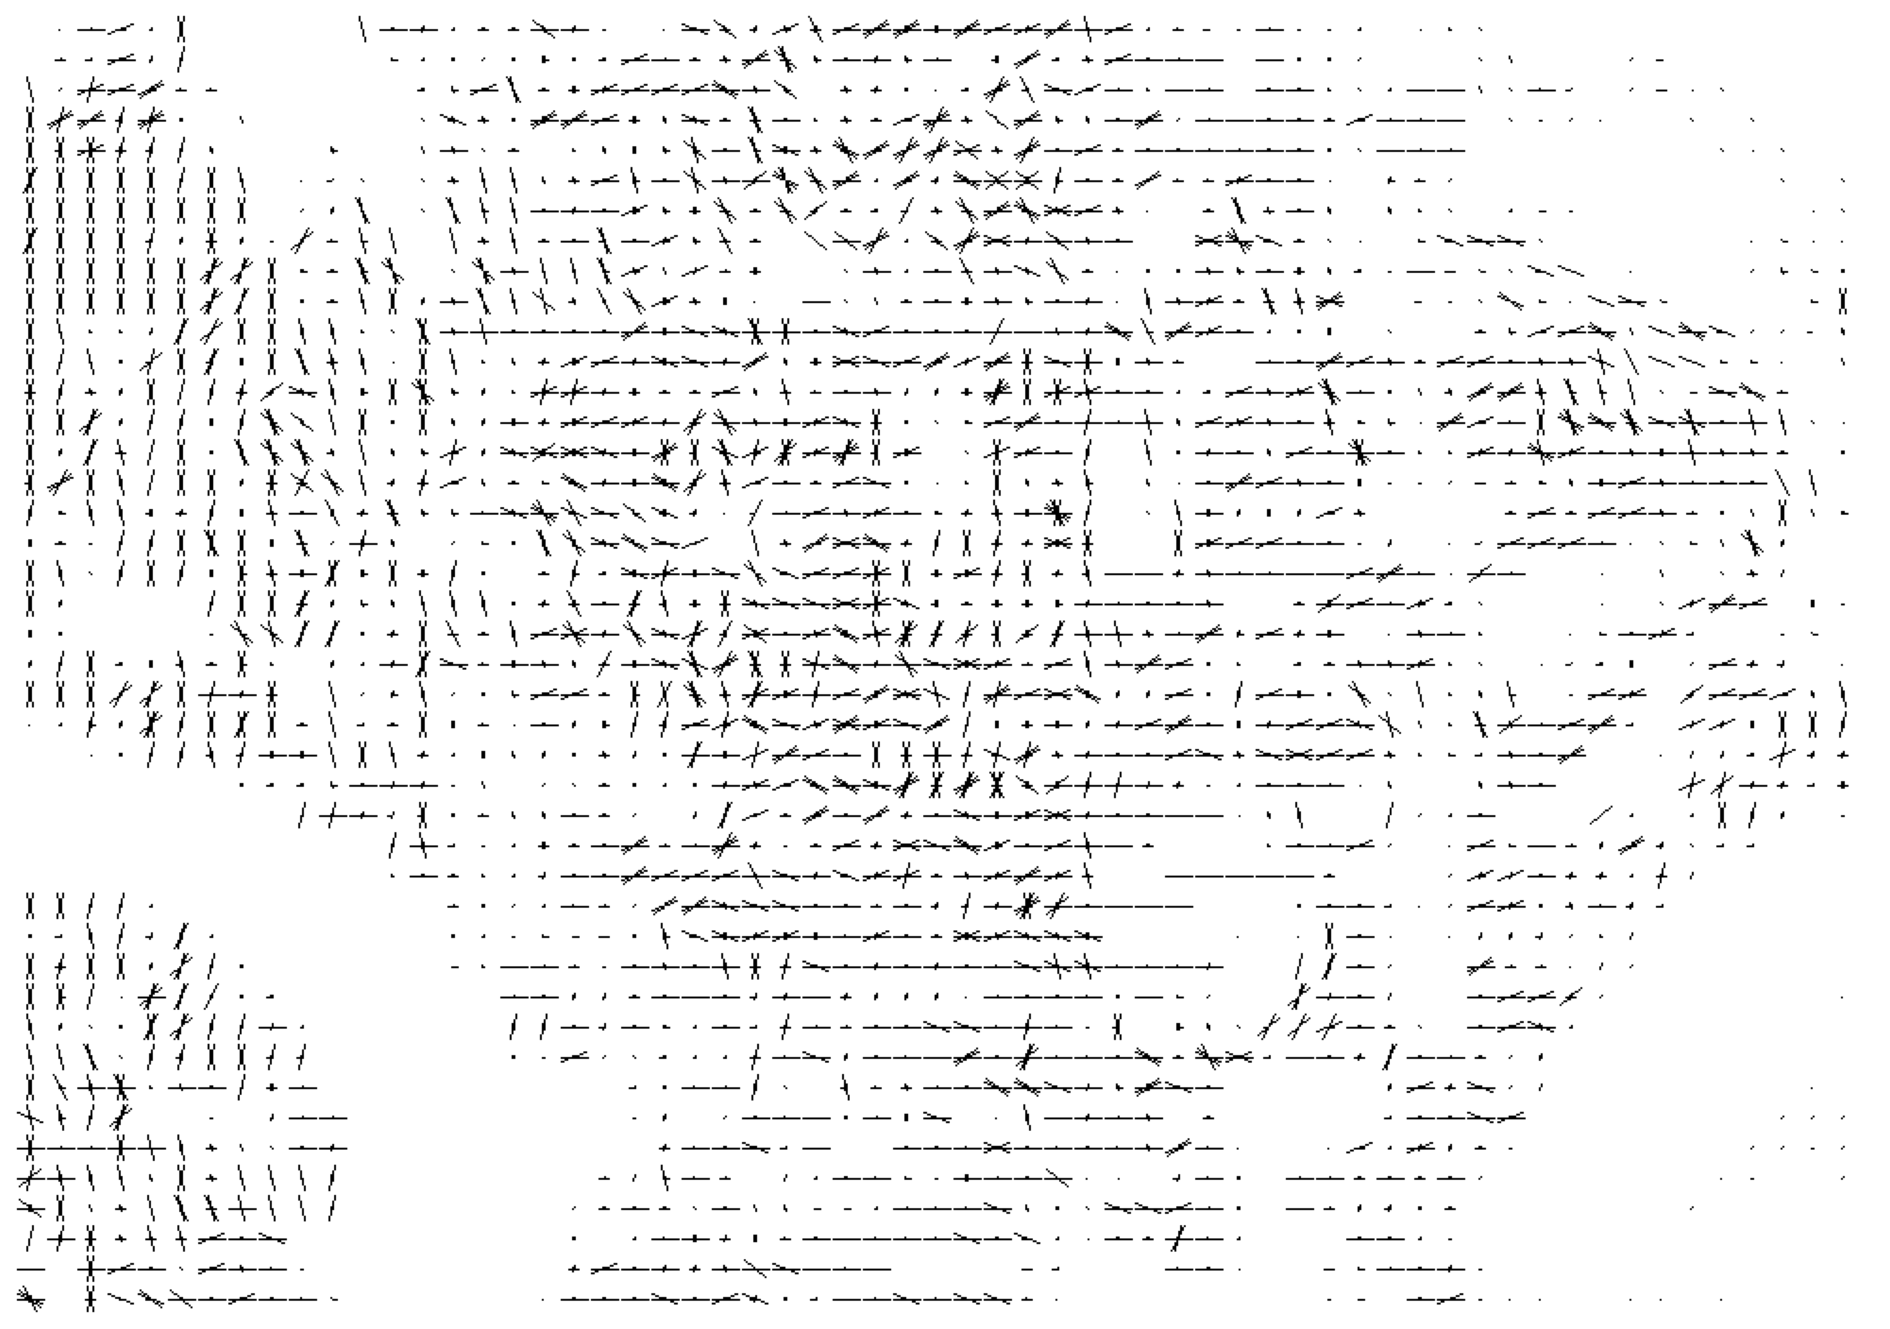

In [ ]:
plt.figure(figsize=(16, 16), dpi=150)
plt.axis("off")
imagem = cv.bitwise_not(binarised_df)
plt.imshow(imagem, cmap='gray')

In [ ]:
import numpy as np
map_data = np.asarray(resized_img)
map_data

array([[[0.26666667, 0.26666667, 0.2745098 ],
        [0.26666667, 0.26666667, 0.2745098 ],
        [0.26666667, 0.26666667, 0.2745098 ],
        ...,
        [0.26666667, 0.26666667, 0.27058824],
        [0.26666667, 0.26666667, 0.27058824],
        [0.26666667, 0.26666667, 0.27058824]],

       [[0.02352941, 0.02745098, 0.03529412],
        [0.02352941, 0.02745098, 0.03529412],
        [0.02352941, 0.03137255, 0.03921569],
        ...,
        [0.02352941, 0.02745098, 0.03137255],
        [0.02352941, 0.02745098, 0.03137255],
        [0.02352941, 0.02745098, 0.03137255]],

       [[0.02352941, 0.02745098, 0.03529412],
        [0.02352941, 0.02745098, 0.03529412],
        [0.02352941, 0.03137255, 0.03921569],
        ...,
        [0.02352941, 0.02745098, 0.03137255],
        [0.02352941, 0.02745098, 0.03137255],
        [0.02352941, 0.02745098, 0.03137255]],

       ...,

       [[0.94901961, 0.94117647, 0.64705882],
        [0.94901961, 0.94117647, 0.64705882],
        [0.79607843, 0

## Overlapping

Overlap = map(brightness) + HOG(0, 1)

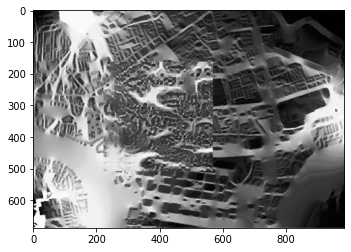

In [ ]:
grayscale = rgb2gray(resized_img)
plt.imshow(grayscale, cmap="gray")

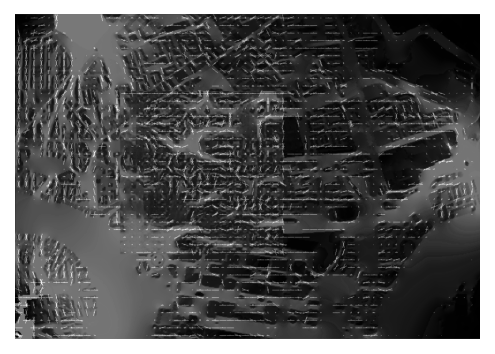

In [ ]:
plt.figure(figsize=(4, 4), dpi=150)
new_map = binarised_df + grayscale
plt.axis('off')
plt.imshow(new_map, cmap="gray")

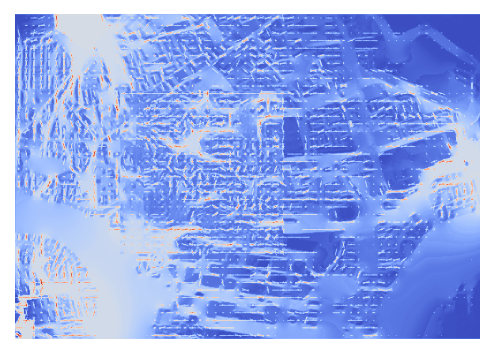

In [ ]:
plt.figure(figsize=(4, 4), dpi=150)
plt.axis('off')
plt.imshow(new_map, cmap="coolwarm")

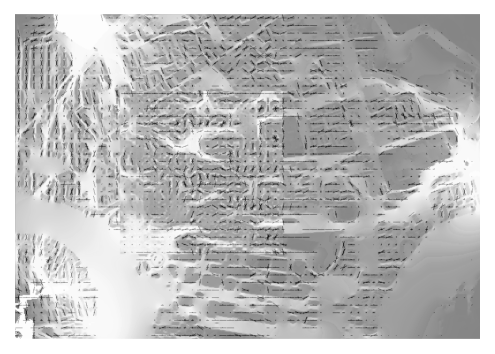

In [ ]:
plt.figure(figsize=(4, 4), dpi=150)
new_map_invert = grayscale - binarised_df
plt.axis('off')
plt.imshow(new_map_invert, cmap="gray")

In [ ]:
new_map

array([[0.26723216, 0.26723216, 0.26723216, ..., 0.26694941, 0.26694941,
        0.26694941],
       [0.02718314, 0.02718314, 0.03027137, ..., 0.02690039, 0.02690039,
        0.02690039],
       [0.02718314, 0.02718314, 0.03027137, ..., 0.02690039, 0.02690039,
        0.02690039],
       ...,
       [0.92163725, 0.92163725, 0.76817451, ..., 0.02718314, 0.02718314,
        0.02718314],
       [0.92135451, 0.92135451, 0.92163725, ..., 0.02718314, 0.02690039,
        0.02690039],
       [0.94129686, 0.94129686, 0.94129686, ..., 0.26723216, 0.26694941,
        0.26694941]])

In [ ]:
new_map_invert

array([[0.26723216, 0.26723216, 0.26723216, ..., 0.26694941, 0.26694941,
        0.26694941],
       [0.02718314, 0.02718314, 0.03027137, ..., 0.02690039, 0.02690039,
        0.02690039],
       [0.02718314, 0.02718314, 0.03027137, ..., 0.02690039, 0.02690039,
        0.02690039],
       ...,
       [0.92163725, 0.92163725, 0.76817451, ..., 0.02718314, 0.02718314,
        0.02718314],
       [0.92135451, 0.92135451, 0.92163725, ..., 0.02718314, 0.02690039,
        0.02690039],
       [0.94129686, 0.94129686, 0.94129686, ..., 0.26723216, 0.26694941,
        0.26694941]])